In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
flood = pd.read_csv("/content/drive/MyDrive/flood.csv") # Reading out the flood data.csv

In [ ]:
flood.isna().sum()

,0
Date,0
Discharge,0
Waterlevel,0
Precipitation,0
max_temperature,0
min_temperature,0
max_humidity,0
min_humidity,0


In [ ]:
flood.duplicated().sum()

0

In [ ]:
flood['Date'] = pd.to_datetime(flood['Date'])

In [ ]:
len(flood[flood['Waterlevel'] <= 0]) # There are 6 rows that has value of waterlevel less than 0

7

In [ ]:
filtered_data = flood[flood['Waterlevel'] <= 0]
filtered_data

,Date,Discharge,Waterlevel,Precipitation,max_temperature,min_temperature,max_humidity,min_humidity
365,2000-12-31,33.0,0.00,0.0,20.1,7.6,95.2,91.2
730,2001-12-31,29.4,-0.35,0.0,21.2,3.2,91.2,74.3
1095,2002-12-31,25.2,-0.37,0.0,18.5,6.0,90.2,95.2
1460,2003-12-31,36.6,-0.31,0.0,19.7,5.1,98.5,61.8
1826,2004-12-31,30.6,-0.02,0.0,17.6,7.8,90.0,59.6
2191,2005-12-31,35.3,-0.32,0.0,22.4,6.0,100.0,48.1
2556,2006-12-31,14.8,-0.35,0.0,21.6,5.6,98.6,52.2


In [ ]:
filtered_dis_data = flood[(flood['Discharge'] > 14) & (flood['Discharge']<34)]

In [ ]:
filtered_dis_data['Waterlevel'].mean()

0.8772059369202225

In [ ]:
# Replace values in 'Waterlevel' where the condition is met
flood.loc[flood['Waterlevel'] <= 0, 'Waterlevel'] = 0.88

In [ ]:
len(flood[flood['Waterlevel'] <= 0])

0

In [ ]:
## Fitting the model on only 4 months data from 6 months to 9 month

In [ ]:
flood['Month'] = flood['Date'].dt.month

In [ ]:
flood3 = flood[(flood['Month']>=6) & (flood['Month']<=9)]

In [ ]:
flood3.shape

(2440, 9)

In [ ]:
df = flood3.copy()
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

In [ ]:
df = df.rolling(window=3).mean().dropna()

In [ ]:
df.head()

,Discharge,Waterlevel,Precipitation,max_temperature,min_temperature,max_humidity,min_humidity,Month
Date,,,,,,,,
2000-06-03,40.866667,1.096667,2.600000,31.300000,21.400000,93.800000,87.733333,6.0
2000-06-04,28.900000,0.926667,0.666667,32.400000,22.333333,90.366667,85.433333,6.0
2000-06-05,23.466667,0.830000,0.666667,33.066667,23.866667,87.233333,86.766667,6.0
2000-06-06,19.600000,0.756667,1.800000,32.066667,24.166667,86.466667,86.166667,6.0
2000-06-07,18.300000,0.730000,4.866667,30.733333,23.566667,90.166667,89.600000,6.0


In [ ]:
df.tail()

,Discharge,Waterlevel,Precipitation,max_temperature,min_temperature,max_humidity,min_humidity,Month
Date,,,,,,,,
2019-09-26,267.000000,2.733333,2.866667,28.200000,21.800000,91.833333,84.233333,9.0
2019-09-27,252.000000,2.670000,2.266667,27.466667,21.566667,91.233333,84.566667,9.0
2019-09-28,245.000000,2.636667,2.600000,26.933333,21.100000,89.466667,84.300000,9.0
2019-09-29,214.000000,2.503333,1.066667,26.800000,20.666667,85.633333,81.600000,9.0
2019-09-30,201.333333,2.443333,0.666667,27.133333,19.866667,82.300000,78.933333,9.0


In [ ]:
df = df.reset_index()

In [ ]:
# Step 1: Split the data into training (2000-2015) and testing (2016-2019)
train_data = df[(df['Date'].dt.year >= 2000) & (df['Date'].dt.year <= 2015)]
test_data = df[(df['Date'].dt.year >= 2016) & (df['Date'].dt.year <= 2019)]

# Step 2: Extract the features (X) and labels (y) for both training and testing sets
X_train = train_data[['Precipitation','Waterlevel', 'max_temperature', 'min_temperature', 'max_humidity', 'min_humidity']]
y_train = train_data[['Discharge']]

X_test = test_data[['Precipitation','Waterlevel', 'max_temperature', 'min_temperature', 'max_humidity', 'min_humidity']]
y_test = test_data[['Discharge']]

In [ ]:
# Print the shape of the datasets to verify
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (1950, 6), y_train shape: (1950, 1)
X_test shape: (488, 6), y_test shape: (488, 1)


In [ ]:
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

In [ ]:
# Fit and transform the training data
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

In [ ]:
# Fit and transform the target data
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

In [ ]:
# Reshape the data for LSTM input
X_train_reshaped = np.reshape(X_train_scaled, (X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = np.reshape(X_test_scaled, (X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, GRU,LSTM, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# Define GRU model with Dropout
gru_model = Sequential()
gru_model.add(GRU(64, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), activation='relu', return_sequences=True))
gru_model.add(Dropout(0.2))
gru_model.add(GRU(32, activation='relu'))
gru_model.add(Dropout(0.2))
gru_model.add(Dense(16, activation='relu'))
gru_model.add(Dense(1, activation='linear'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compile GRU model
gru_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

# Train GRU model with early stopping
gru_history = gru_model.fit(X_train_reshaped, y_train_scaled, epochs=100, batch_size=32, validation_split=0.2, verbose=1, callbacks=[early_stopping])


Epoch 1/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 12s 94ms/step - loss: 0.0107 - mae: 0.0759 - val_loss: 0.0134 - val_mae: 0.0725
Epoch 2/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0085 - mae: 0.0643 - val_loss: 0.0132 - val_mae: 0.0662
Epoch 3/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0070 - mae: 0.0589 - val_loss: 0.0099 - val_mae: 0.0611
Epoch 4/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mae: 0.0495 - val_loss: 0.0063 - val_mae: 0.0469
Epoch 5/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mae: 0.0453 - val_loss: 0.0056 - val_mae: 0.0446
Epoch 6/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0032 - mae: 0.0402 - val_loss: 0.0067 - val_mae: 0.0587
Epoch 7/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0035 - mae: 0.0412 - val_loss: 0.0050 - val_mae: 0.0390
Epoch 8/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0041 - mae: 0.0394 - val_loss: 0.0046 - val_mae: 0.0409
Epoch 9/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0

In [ ]:
# Make predictions
predictions_scaled = gru_model.predict(X_test_reshaped)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step


In [ ]:
# Inverse transform the predictions
predictions = scaler_y.inverse_transform(predictions_scaled)

In [ ]:
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

In [ ]:
print("MSE/= ", mse)
print("MAE/= ", mae)

MSE/=  2905.6261745025527
MAE/=  35.429550974486304


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# After making predictions (predictions are already rescaled)
predictions = scaler_y.inverse_transform(predictions_scaled)

# Calculate R-Squared
r2 = r2_score(y_test, predictions)
print(f"R-Squared: {r2}")

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"RMSE: {rmse}")

# Calculate NSE
nse = 1 - (np.sum((y_test - predictions) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))
print(f"NSE: {nse}")

R-Squared: 0.9414872145177743
RMSE: 53.9038604786573
NSE: Discharge    0.941487
dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [ ]:
results_by_year = []

for year in range(2016, 2020):  # Loop over each year from 2016 to 2019
    yearly_test_data = test_data[test_data['Date'].dt.year == year]
    X_year = yearly_test_data[['Precipitation','Waterlevel', 'max_temperature', 'min_temperature', 'max_humidity', 'min_humidity']]
    y_year = yearly_test_data[['Discharge']]

    # Scale the test data for the current year
    X_year_scaled = scaler_X.transform(X_year)
    y_year_scaled = scaler_y.transform(y_year)

    # Reshape for GRU input
    X_year_reshaped = np.reshape(X_year_scaled, (X_year_scaled.shape[0], X_year_scaled.shape[1], 1))

    # Make predictions
    predictions_scaled = gru_model.predict(X_year_reshaped)
    predictions = scaler_y.inverse_transform(predictions_scaled)  # Rescale back to original scale

    # Calculate Metrics
    r2 = r2_score(y_year, predictions)
    rmse = np.sqrt(mean_squared_error(y_year, predictions))
    nse = 1 - (np.sum((y_year.values - predictions) ** 2) / np.sum((y_year.values - np.mean(y_year.values)) ** 2))

    # You can calculate additional metrics such as PBIAS, RSR, etc.
    pbias = 100 * np.sum(y_year.values - predictions) / np.sum(y_year.values)
    rsr = rmse / np.std(y_year.values)

    # Store the results for each year
    results_by_year.append({
        "Year": year,
        "R²": r2,
        "RMSE": rmse,
        "NSE": nse,
        "PBIAS": pbias,
        "RSR": rsr
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results_by_year)

# Display the evaluation metrics for each year
print(results_df)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
   Year        R²       RMSE       NSE      PBIAS       RSR
0  2016  0.981814  38.593875  0.981814  -5.542615  0.134856
1  2017  0.892914  77.469910  0.892914 -12.340659  0.327240
2  2018  0.923638  44.525201  0.923638 -12.939565  0.276337
3  2019  0.929794  46.356630  0.929794  -8.996967  0.264965


In [ ]:
results_by_year_training = []

for year in range(2000, 2016):  # Loop over each year from 2000 to 2015
    yearly_train_data = train_data[train_data['Date'].dt.year == year]
    X_year = yearly_train_data[['Precipitation','Waterlevel', 'max_temperature', 'min_temperature', 'max_humidity', 'min_humidity']]
    y_year = yearly_train_data[['Discharge']]

    # Scale the test data for the current year
    X_year_scaled = scaler_X.transform(X_year)
    y_year_scaled = scaler_y.transform(y_year)

    # Reshape for GRU input
    X_year_reshaped = np.reshape(X_year_scaled, (X_year_scaled.shape[0], X_year_scaled.shape[1], 1))

    # Make predictions
    predictions_scaled = gru_model.predict(X_year_reshaped)
    predictions = scaler_y.inverse_transform(predictions_scaled)  # Rescale back to original scale

    # Calculate Metrics
    r2 = r2_score(y_year, predictions)
    rmse = np.sqrt(mean_squared_error(y_year, predictions))
    nse = 1 - (np.sum((y_year.values - predictions) ** 2) / np.sum((y_year.values - np.mean(y_year.values)) ** 2))

    # You can calculate additional metrics such as PBIAS, RSR, etc.
    pbias = 100 * np.sum(y_year.values - predictions) / np.sum(y_year.values)
    rsr = rmse / np.std(y_year.values)

    # Store the results for each year
    results_by_year_training.append({
        "Year": year,
        "R²": r2,
        "RMSE": rmse,
        "NSE": nse,
        "PBIAS": pbias,
        "RSR": rsr
    })

# Convert results to DataFrame
results_df_training = pd.DataFrame(results_by_year_training)

# Display the evaluation metrics for each year (2000 to 2015)
print(results_df_training)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
    Year        R²        RMSE       NSE      PBIAS       RSR
0   2000  0.973169   65.388575  0.973169   1.361314  0.163800
1   2001  0.982012   35.506633  0.982012  -2.330886  0.134119
2   2002  0.937441   38.087439  0.937441  -6.978107  0.250119
3   2003  0.946032   61.936654  0.946032   4.103319  0.232311
4   2004  0.940535   28.681782  0.940535  -0.569473  0.243854
5   2005  0.968970 

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


<ipython-input-44-244990739d71>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Observed_Discharge'] = actual_discharge_test
<ipython-input-44-244990739d71>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Simulated_Discharge'] = predicted_discharge_test


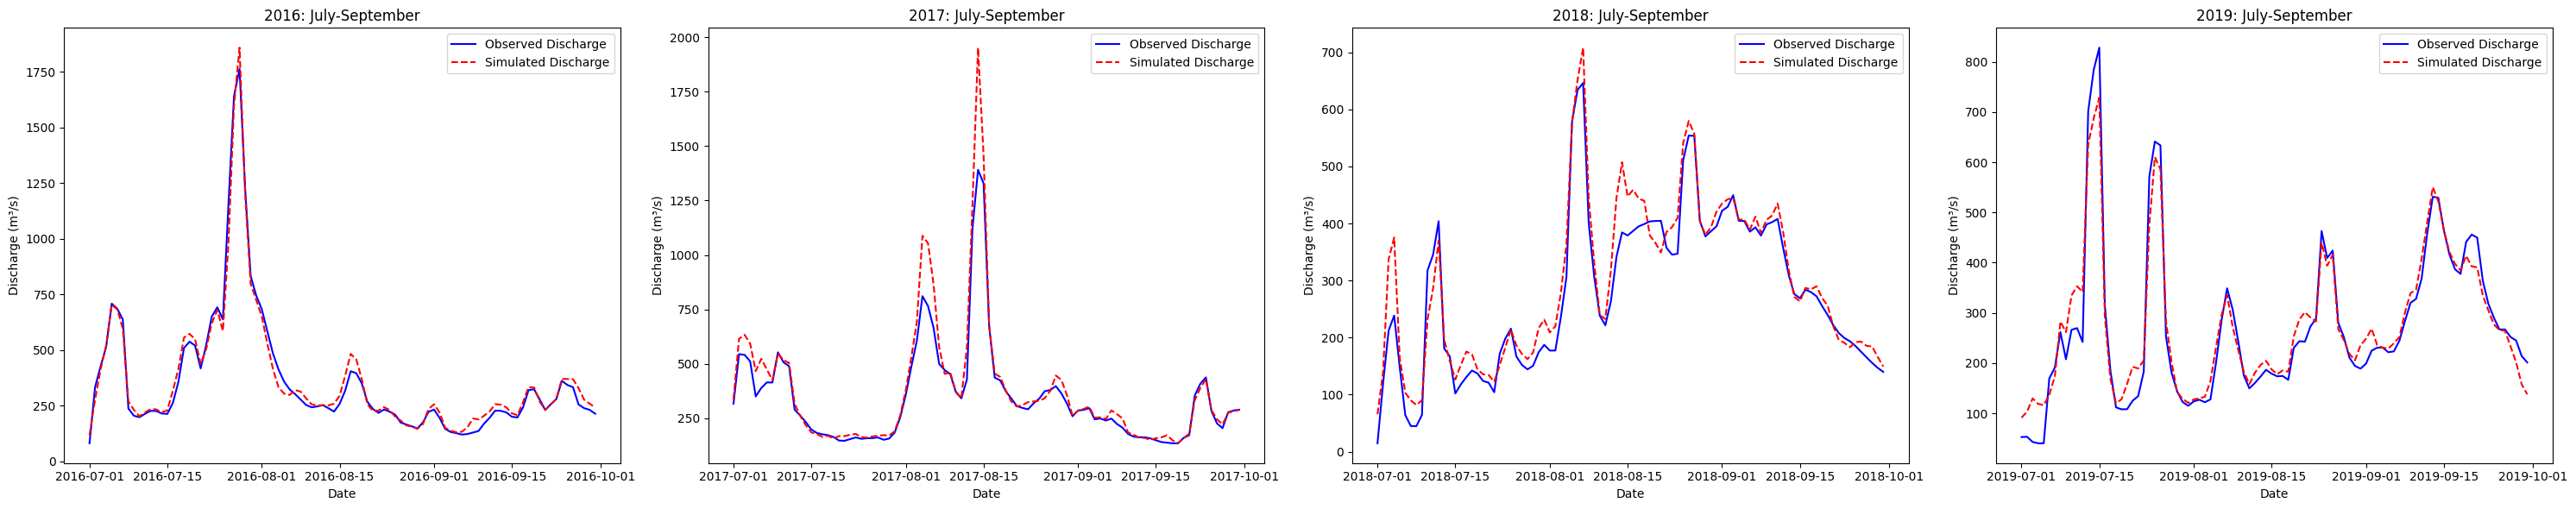

In [ ]:
# Step 1: Prepare the actual (observed) and predicted discharge data for the test set (2016-2019)
actual_discharge_test = y_test.values  # Observed discharge in test data
predicted_discharge_test_scaled = gru_model.predict(X_test_reshaped)  # Simulated discharge for test set
predicted_discharge_test = scaler_y.inverse_transform(predicted_discharge_test_scaled)  # Inverse transform to original scale

# Step 2: Create a dataframe for the test data with discharge data
test_data['Observed_Discharge'] = actual_discharge_test
test_data['Simulated_Discharge'] = predicted_discharge_test

# Step 3: Define the function to plot test data for July to September (2016-2019)
def plot_discharge_july_september(data):
    years = [2016, 2017, 2018, 2019]  # Define the years of interest
    fig, axes = plt.subplots(1, len(years), figsize=(30, 6))  # Create a row of subplots, one for each year

    for i, year in enumerate(years):
        # Filter data for the current year and the months July to September (7, 8, 9)
        year_data = data[(data['Date'].dt.year == year) & (data['Date'].dt.month >= 7) & (data['Date'].dt.month <= 9)]

        # Plot observed vs simulated discharge for July to September of the current year
        ax = axes[i]
        ax.plot(year_data['Date'], year_data['Observed_Discharge'], color='blue', label='Observed Discharge')
        ax.plot(year_data['Date'], year_data['Simulated_Discharge'], color='red', linestyle='--', label='Simulated Discharge')

        # Set titles and labels
        ax.set_title(f'{year}: July-September')
        ax.set_ylabel('Discharge (m³/s)')
        ax.set_xlabel('Date')
        ax.legend()

    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()

# Step 4: Call the function to create the plot
plot_discharge_july_september(test_data)


In [ ]:
flood.head()

,Date,Discharge,Waterlevel,Precipitation,max_temperature,min_temperature,max_humidity,min_humidity,Month
0,2000-01-01,28.8,0.93,0.0,21.0,3.6,91.7,81.4,1
1,2000-01-02,28.4,0.92,0.0,21.2,3.5,93.0,77.4,1
2,2000-01-03,29.0,0.93,0.0,22.5,4.0,93.1,81.9,1
3,2000-01-04,28.8,0.93,0.0,21.2,3.4,92.9,74.7,1
4,2000-01-05,30.2,0.95,0.0,21.2,1.5,92.4,76.0,1


In [ ]:
dis = flood[flood['Discharge'] == 5822.0]

In [ ]:
dis

,Date,Discharge,Waterlevel,Precipitation,max_temperature,min_temperature,max_humidity,min_humidity,Month
5340,2014-08-15,5822.0,9.13,298.4,28.0,21.5,100.0,85.5,8


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


<ipython-input-52-e84aa65e9c7b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Observed_Discharge'] = actual_discharge_train
<ipython-input-52-e84aa65e9c7b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Simulated_Discharge'] = predicted_discharge_train


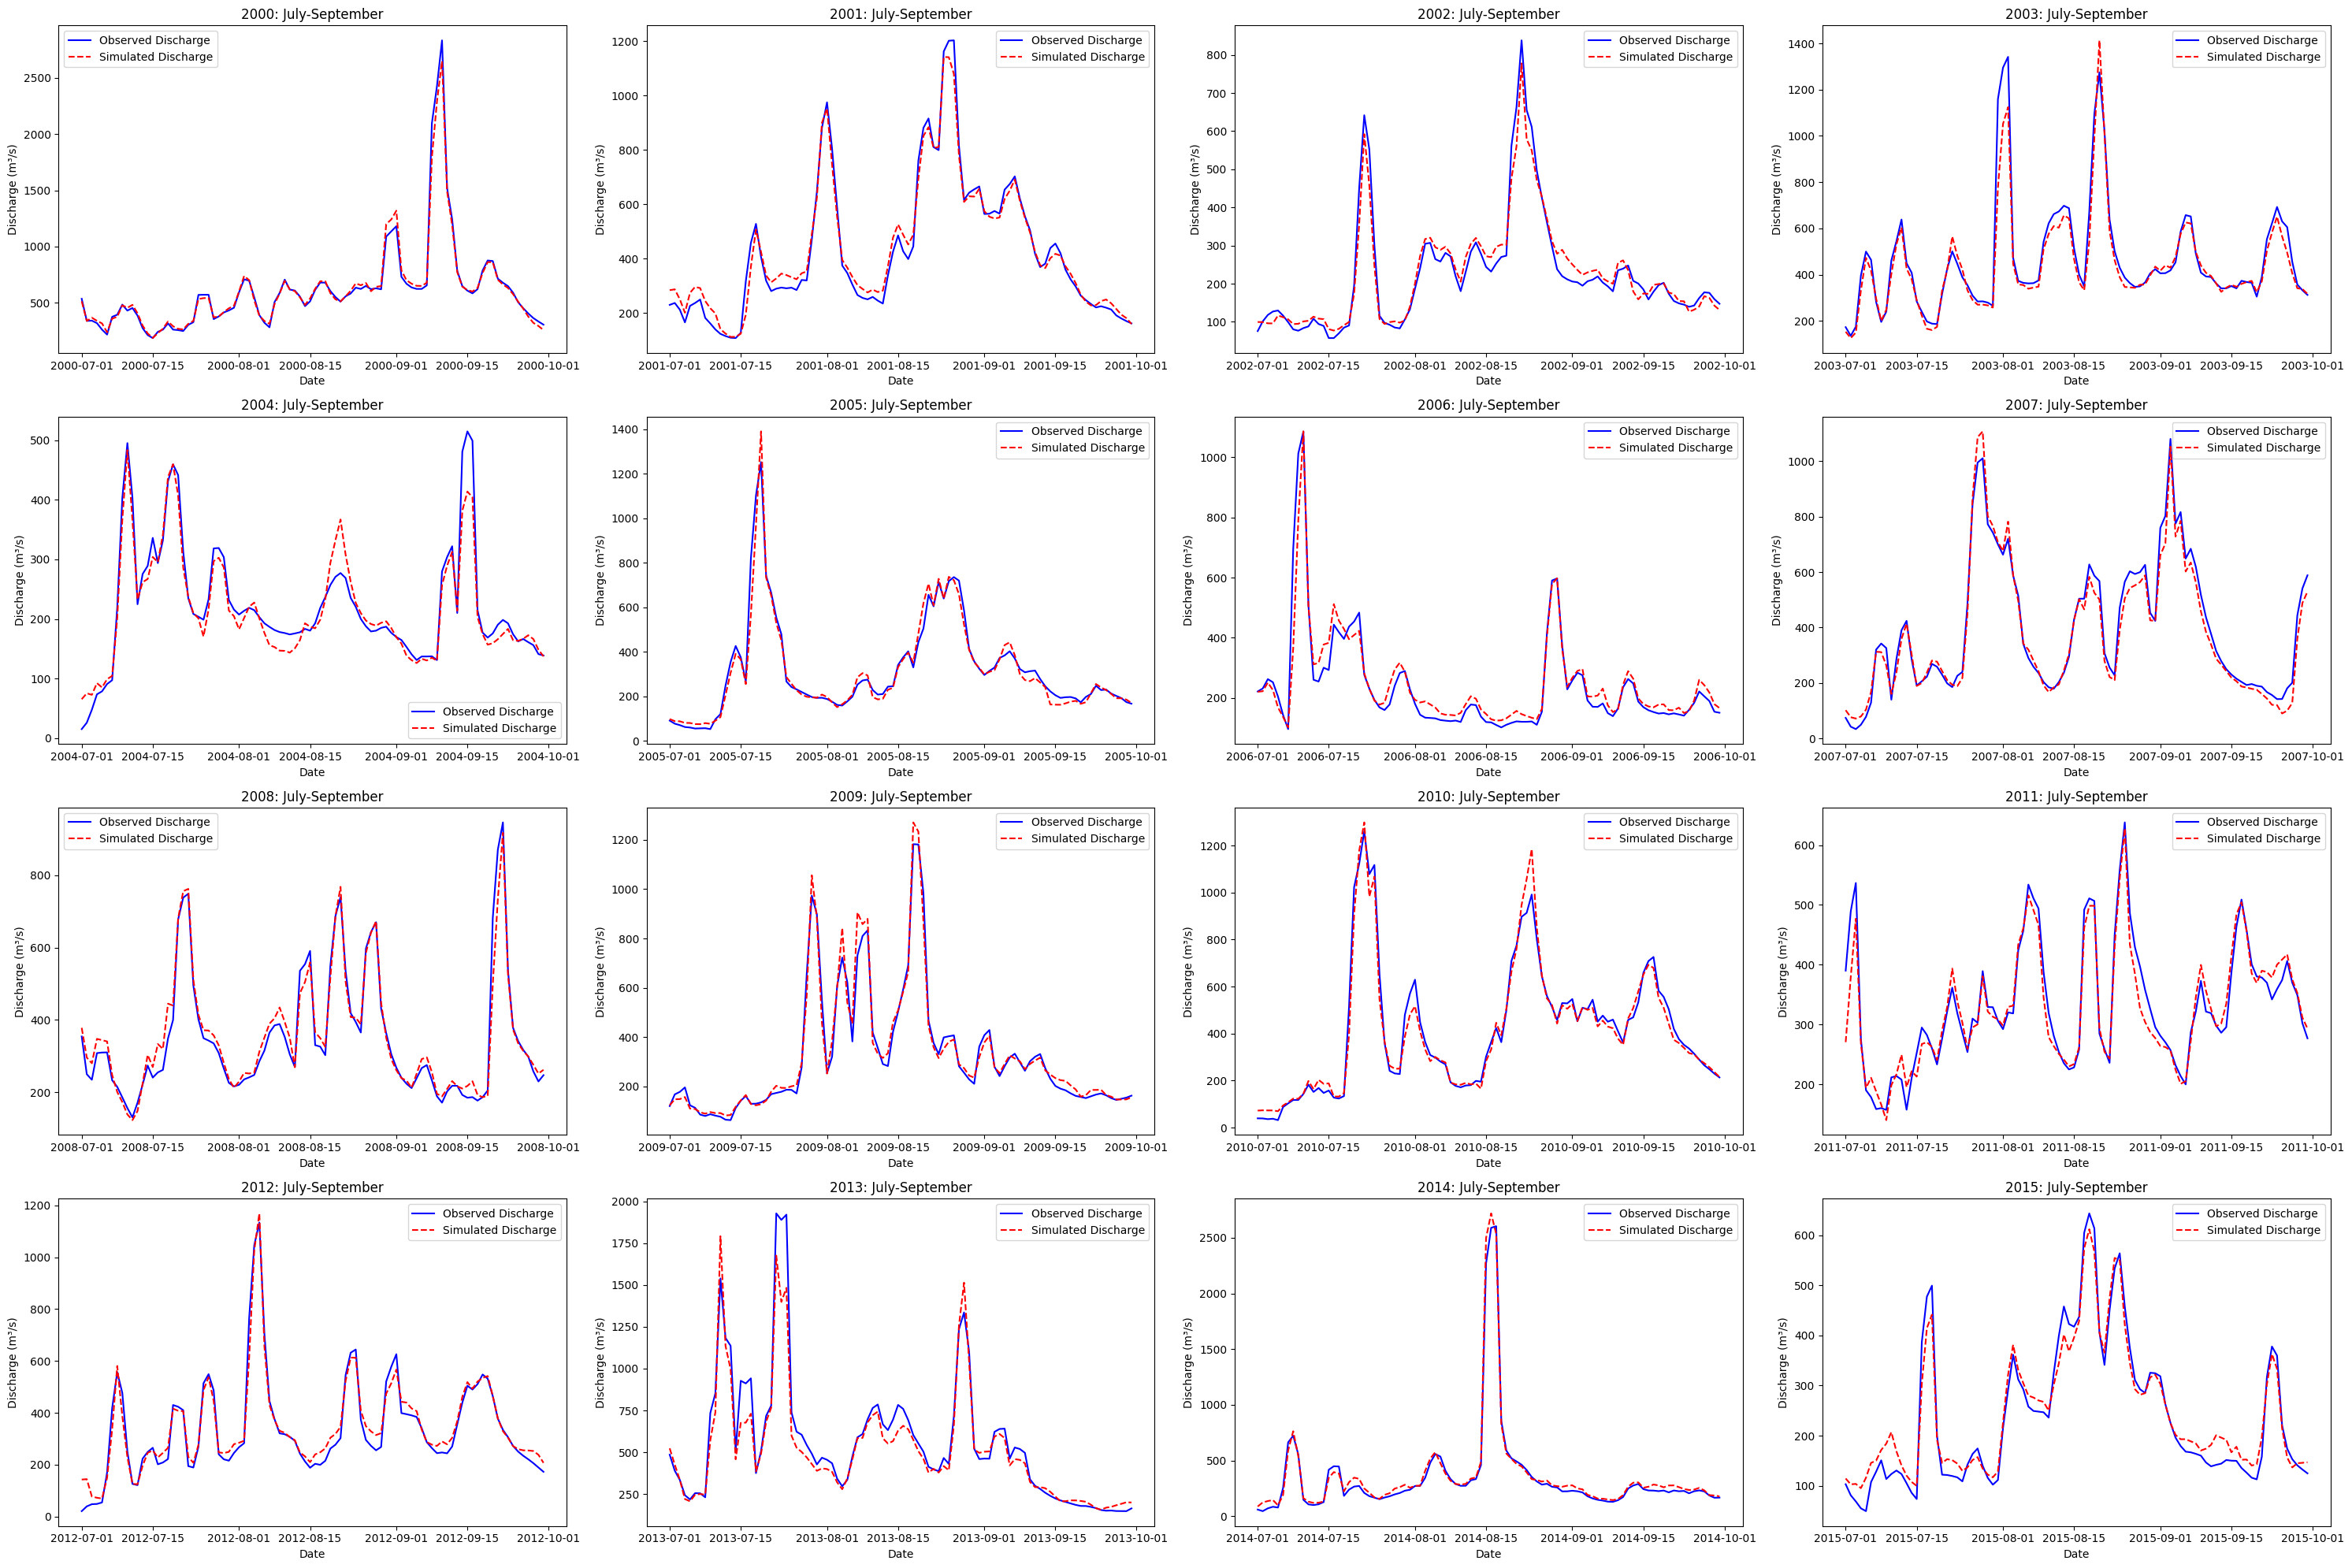

In [ ]:
# Step 1: Prepare the actual (observed) and predicted discharge data for the training set (2000-2015)
actual_discharge_train = y_train.values  # Observed discharge in training data
predicted_discharge_train_scaled = gru_model.predict(X_train_reshaped)  # Simulated discharge for training set
predicted_discharge_train = scaler_y.inverse_transform(predicted_discharge_train_scaled)  # Inverse transform to original scale

# Step 2: Create a dataframe for the training data with discharge data
train_data['Observed_Discharge'] = actual_discharge_train
train_data['Simulated_Discharge'] = predicted_discharge_train

# Step 3: Define the function to plot training data for July to September (2000-2015)
def plot_discharge_july_september_train(data):
    years = range(2000, 2016)  # Define the years of interest
    fig, axes = plt.subplots(4, 4, figsize=(30, 20))  # Create a grid of subplots (4x4) for each year

    for i, year in enumerate(years):
        # Filter data for the current year and the months July to September (7, 8, 9)
        year_data = data[(data['Date'].dt.year == year) & (data['Date'].dt.month >= 7) & (data['Date'].dt.month <= 9)]

        # Calculate the row and column indices for the subplot grid
        row = i // 4
        col = i % 4

        # Plot observed vs simulated discharge for July to September of the current year
        ax = axes[row, col]
        ax.plot(year_data['Date'], year_data['Observed_Discharge'], color='blue', label='Observed Discharge')
        ax.plot(year_data['Date'], year_data['Simulated_Discharge'], color='red', linestyle='--', label='Simulated Discharge')

        # Set titles and labels
        ax.set_title(f'{year}: July-September')
        ax.set_ylabel('Discharge (m³/s)')
        ax.set_xlabel('Date')
        ax.legend()

    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()

# Step 4: Call the function to create the plot for training data
plot_discharge_july_september_train(train_data)
